In [39]:
#--- load required packages
import os
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

#--- load data
ing_mat = loadmat('MATLAB/ingredients.mat')['ingredients']
cityDist_mat = loadmat('MATLAB/citiesDistMat.mat')['citiesDistMat']
labelName_mat = loadmat('MATLAB/labelNames.mat')['labelNames']
labels_mat = loadmat('MATLAB/labels.mat')['labels']
recipe_mat = loadmat('MATLAB/recipes.mat')['recipes']

#--- for colnames
ing_headline = []
for i in ing_mat[0]:
    ing_headline.append(i[0])
#--- create data matrices
dataset_X = pd.DataFrame(recipe_mat,columns=ing_headline) #predictors
dataset_y = pd.DataFrame(labels_mat,columns=['label']) #labels
X_train_full,X_test,y_train_full,y_test = train_test_split(dataset_X,dataset_y,test_size=0.2) #train test split
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,test_size=0.25) #train val split
X_train_len = len(X_train)


In [152]:
# print(dataset_X.head(n=3))
print(labelName_mat.shape)

(4236, 1)


In [ ]:
"""
    There are 709 ingredients which are used in 12 different cuisines 
    for 4236 recipes.  
    * label_mat: Number indicating the cuisine a recipe belongs to
    * labelName_mat: same as above just with names instead of numbers
    * recipe_mat: indicates which ingredients were used for a particular recipe
    * cityDist_mat: how far countries are away from each other distance-wise
"""

In [60]:
# X_train.describe()
freq_ing = dataset_X.sum()
print(freq_ing)

acorn squash                       3
adobo                              5
african birdseye chile pepper      4
ale                                5
aleppo pepper                      1
                                ... 
yellow squash                     10
yogurt                           149
zaatar                             2
zest                              15
zucchini                         123
Length: 709, dtype: int64


In [105]:
#--- how to get index of rows corresponding to one cuisine
idx = dataset_y.index[dataset_y.label == 1]
dataset_X.iloc[idx].sum()

acorn squash                     0
adobo                            0
african birdseye chile pepper    0
ale                              0
aleppo pepper                    0
                                ..
yellow squash                    0
yogurt                           0
zaatar                           0
zest                             8
zucchini                         3
Length: 709, dtype: int64

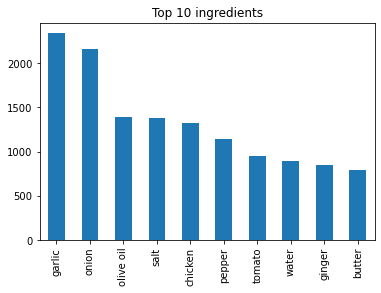

In [61]:
#--- top 10 most used ingredients
fig, ax = plt.subplots()
most_freq_ing = freq_ing.nlargest(10)
ax.set_title("Top 10 ingredients")
most_freq_ing.plot.bar()

In [199]:
#--- top 3 ingredient per cuisine
#fig, axes = plt.subplots(4,3, figsize=(10,10))
#for i in range(0, 12, 1):
 #   idx = dataset_y.index[dataset_y.label == i+1]
  #  freq_ing_cuis = dataset_X.iloc[idx].sum()
   # most_freq_ing_cuis = freq_ing_cuis.nlargest(3)
   # print(labelName_mat[idx[i]][0])
    #most_freq_ing_cuis.plot.bar(title = "Cuisine {}".format(labelName_mat[idx[0]][0]))
    #plt.show()
    

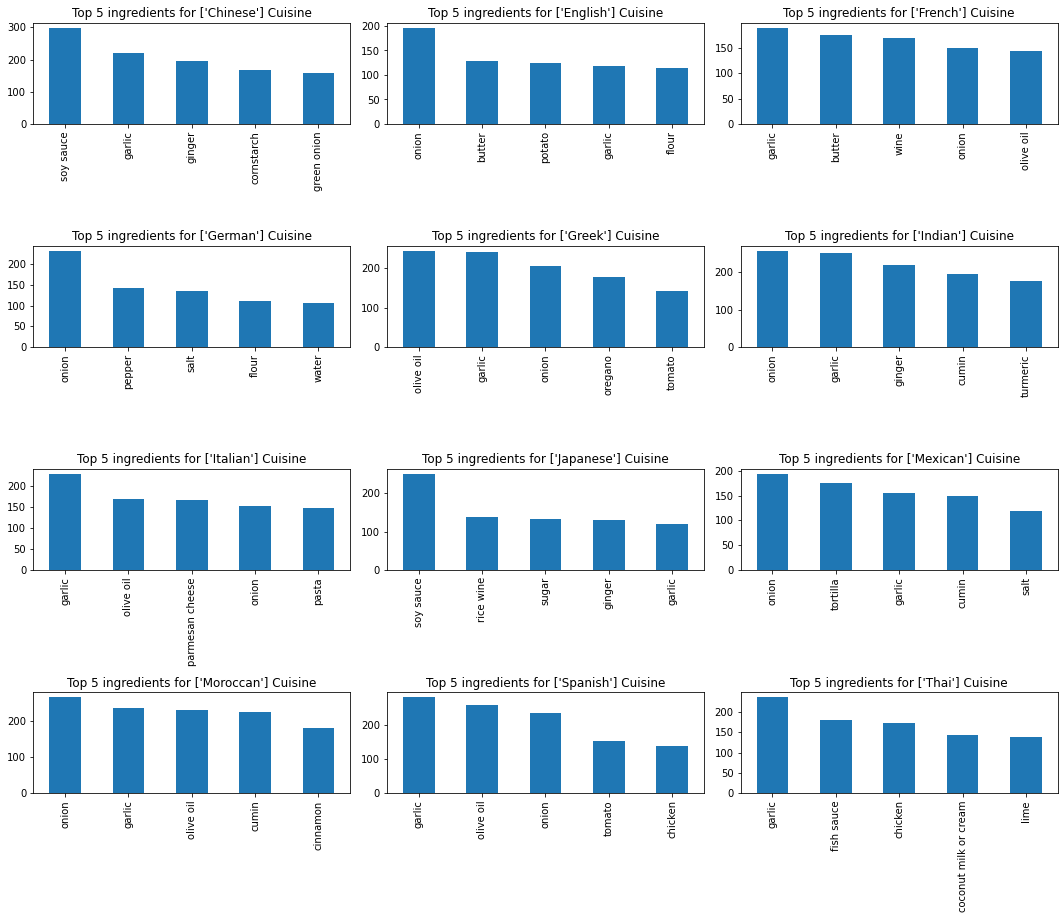

In [230]:
#--- top 3 ingredient per cuisine
#--- could still change colors
n_ing = 5
ing_list = []

fig, axes = plt.subplots(4,3, figsize=(15,12))
n = 0
for i in range(0,4,1):
    for j in range(0,3,1):
        idx = dataset_y.index[dataset_y.label == n+1]
        freq_ing_cuis = dataset_X.iloc[idx].sum()
        most_freq_ing_cuis = freq_ing_cuis.nlargest(n_ing)
        ing_list.append(most_freq_ing_cuis)
        fig.tight_layout()
        most_freq_ing_cuis.plot.bar(title = "Top {} ingredients for {} Cuisine".format(n_ing, labelName_mat[idx[0]][0]), 
                                    ax=axes[i,j])
        n+=1
        

In [222]:
# Ingredients that do not appear in a cuisine
for n in range(0, 12, 1):
    idx = dataset_y.index[dataset_y.label == n+1]
    freq_ing_cuis = dataset_X.iloc[idx].sum()
    not_cuis = freq_ing_cuis

In [227]:
idx = dataset_y.index[dataset_y.label == 1]
freq_ing_cuis = dataset_X.iloc[idx].sum()
not_idx = freq_ing_cuis.index[freq_ing_cuis == 0]
not_idx

# nope not helpful at all - too many ingredients not used

Index(['acorn squash', 'adobo', 'african birdseye chile pepper', 'ale',
       'aleppo pepper', 'alfredo sauce', 'allspice', 'almond butter',
       'amaretti', 'amchoor powder',
       ...
       'whole milk', 'wild rice', 'winter squash', 'yams', 'yeast',
       'yellow curry paste', 'yellow split pea', 'yellow squash', 'yogurt',
       'zaatar'],
      dtype='object', length=469)

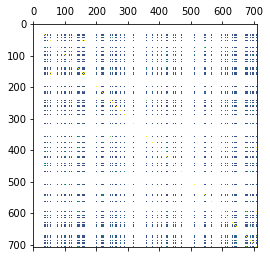

In [221]:
plt.matshow(dataset_X[1:100].corr())
plt.show()

In [208]:
dataset_X.corr()

,acorn squash,adobo,african birdseye chile pepper,ale,aleppo pepper,alfalfa sprouts,alfredo sauce,allspice,almond,almond butter,...,yams,yeast,yellow curry paste,yellow food coloring,yellow split pea,yellow squash,yogurt,zaatar,zest,zucchini
acorn squash,1.000000,-0.000915,-0.000818,-0.000915,-0.000409,-0.000709,-0.000818,-0.003081,-0.003764,-0.000409,...,-0.000409,-0.001834,-0.000709,-0.000409,-0.000709,-0.001295,-0.005083,-0.000579,-0.001587,-0.004604
adobo,-0.000915,1.000000,-0.001057,-0.001182,-0.000528,-0.000915,-0.001057,-0.003979,-0.004860,-0.000528,...,-0.000528,-0.002368,-0.000915,-0.000528,-0.000915,-0.001672,-0.006564,-0.000747,-0.002049,-0.005945
african birdseye chile pepper,-0.000818,-0.001057,1.000000,-0.001057,-0.000472,-0.000818,-0.000945,-0.003558,-0.004346,-0.000472,...,-0.000472,-0.002117,-0.000818,-0.000472,-0.000818,-0.001496,-0.005870,-0.000668,-0.001833,0.040458
ale,-0.000915,-0.001182,-0.001057,1.000000,-0.000528,-0.000915,-0.001057,-0.003979,-0.004860,-0.000528,...,-0.000528,-0.002368,-0.000915,-0.000528,-0.000915,-0.001672,-0.006564,-0.000747,-0.002049,-0.005945
aleppo pepper,-0.000409,-0.000528,-0.000472,-0.000528,1.000000,-0.000409,-0.000472,-0.001779,-0.002172,-0.000236,...,-0.000236,-0.001058,-0.000409,-0.000236,-0.000409,-0.000747,-0.002934,-0.000334,-0.000916,-0.002657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yellow squash,-0.001295,-0.001672,-0.001496,-0.001672,-0.000747,-0.001295,-0.001496,-0.005630,-0.006877,-0.000747,...,-0.000747,-0.003350,-0.001295,-0.000747,-0.001295,1.000000,-0.009288,-0.001057,-0.002900,0.194383
yogurt,-0.005083,-0.006564,-0.005870,-0.006564,-0.002934,0.043087,-0.005870,0.022778,0.065464,-0.002934,...,-0.002934,-0.013151,-0.005083,-0.002934,-0.005083,-0.009288,1.000000,-0.004150,-0.011382,-0.025387
zaatar,-0.000579,-0.000747,-0.000668,-0.000747,-0.000334,-0.000579,-0.000668,-0.002516,-0.003073,-0.000334,...,-0.000334,-0.001497,-0.000579,-0.000334,-0.000579,-0.001057,-0.004150,1.000000,-0.001296,0.060961
zest,-0.001587,-0.002049,-0.001833,-0.002049,-0.000916,-0.001587,-0.001833,-0.006900,-0.008427,-0.000916,...,-0.000916,-0.004106,-0.001587,-0.000916,-0.001587,-0.002900,-0.011382,-0.001296,1.000000,-0.010309


In [217]:
#sns.pairplot(dataset_X)

In [231]:
#--- from https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(dataset_X))

Top Absolute Correlations
cheshire cheese          english muffin    1.000000
sazon goya               sofrito sauce     0.816400
almond butter            coconut oil       0.707023
burdock root             kamaboko          0.707023
french style green bean  gumbo             0.707023
dtype: float64


In [244]:
#--- how many recipes of each cuisine?
num_recipes_cuis = []

for i in range(0, 12, 1):
    #print(dataset_y[dataset_y.label == i+1])
    num_recipes_cuis.append(len(dataset_y[dataset_y.label == i+1]))
    
print(num_recipes_cuis)


[353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353]


In [249]:
#--- everything looking good, nicely balanced data set, no weird labels
#--- but same in txt files?
dataset_y.label.isin(range(1, 13, 1)).all()

True

In [250]:
num_recipes_cuis = []

for i in range(0, 12, 1):
    #print(dataset_y[dataset_y.label == i+1])
    num_recipes_cuis.append(len(y_train[y_train.label == i+1]))
    
print(num_recipes_cuis)

[216, 217, 207, 188, 213, 220, 222, 204, 211, 210, 223, 210]
